In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
dataset = pd.read_csv("10000sample_bin.csv")
categorical = ['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID']
data = dataset.as_matrix()
#hpc_fit, hpc_fit1 = train_test_split(data, train_size=.1)
hpc_fit = data
dataset.head()

,Semana=3,Semana=4,Semana=5,Semana=6,Semana=7,Semana=8,Semana=9,Agencia_ID=1110,Agencia_ID=1111,Agencia_ID=1112,...,Producto_ID=49860,Producto_ID=49944,Producto_ID=49972,Producto_ID=49973,Producto_ID=49994,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,16.35,0,0.0,1
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,3,22.50,0,0.0,3
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,4,30.00,0,0.0,4
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,6,45.84,0,0.0,6
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,12,211.20,0,0.0,12


In [2]:
hpc_fit.shape

(10000L, 12131L)

In [5]:
import gc
hpc = PCA(n_components=3).fit_transform(hpc_fit)
gc.collect()

9

In [8]:
k_means = KMeans(n_clusters = 3)
k_means.fit(hpc)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [9]:
from sklearn.metrics import silhouette_score

labels = k_means.labels_
silhouette_score(hpc, labels, metric='euclidean')

0.95810663535608587

In [ ]:
k_means = KMeans(n_clusters = 3)
k_means.fit(hpc)
gc.collect()
x_min, x_max = hpc[:, 0].min() - 5, hpc[:, 0].max() - 1
y_min, y_max = hpc[:, 1].min(), hpc[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 1))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')

plt.plot(hpc[:, 0], hpc[:, 1], 'k.', markersize=4)
centroids = k_means.cluster_centers_
inert = k_means.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=169, linewidths=3,
           color='w', zorder=8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

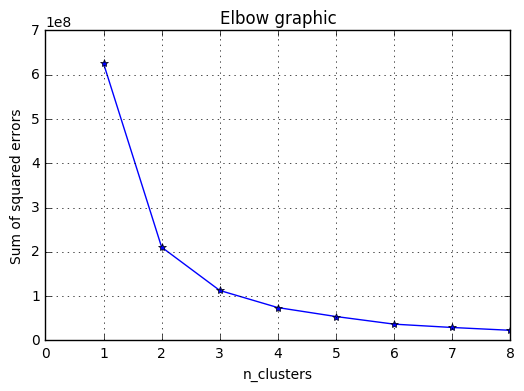

In [10]:
k_range = range(1,9) 
k_means = [KMeans(n_clusters=k).fit(hpc) for k in k_range] 
SSE = [X.inertia_ for X in k_means]

fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot(k_range, SSE, 'b*-') 
ax.set_xlim((0,8))

plt.grid(True) 
plt.xlabel('n_clusters') 
plt.ylabel('Sum of squared errors') 
plt.title('Elbow graphic') 
plt.show()

In [7]:
hpc.shape

(10000L, 3L)

In [11]:
hpc = PCA(n_components=2).fit_transform(hpc_fit)

In [13]:
k_means = KMeans(n_clusters = 3)
k_means.fit(hpc)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [14]:
from sklearn.metrics import silhouette_score

labels = k_means.labels_
silhouette_score(hpc, labels, metric='euclidean')

0.95896409935838289

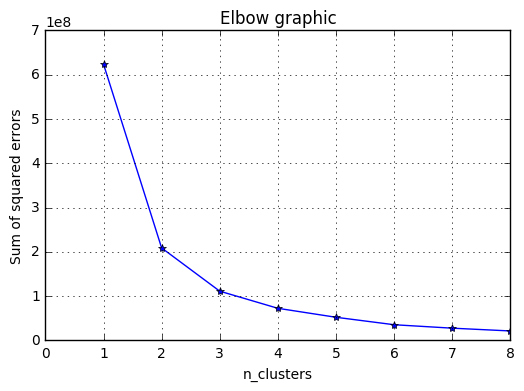

In [15]:
k_range = range(1,9) 
k_means = [KMeans(n_clusters=k).fit(hpc) for k in k_range] 
SSE = [X.inertia_ for X in k_means]

fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot(k_range, SSE, 'b*-') 
ax.set_xlim((0,8))

plt.grid(True) 
plt.xlabel('n_clusters') 
plt.ylabel('Sum of squared errors') 
plt.title('Elbow graphic') 
plt.show()

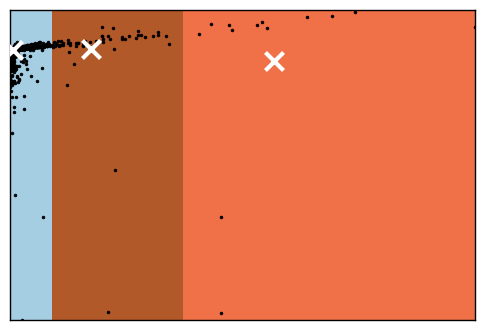

In [16]:
k_means = KMeans(n_clusters = 3)
k_means.fit(hpc)
x_min, x_max = hpc[:, 0].min() - 5, hpc[:, 0].max() - 1
y_min, y_max = hpc[:, 1].min(), hpc[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 1))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')

plt.plot(hpc[:, 0], hpc[:, 1], 'k.', markersize=4)
centroids = k_means.cluster_centers_
inert = k_means.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=169, linewidths=3,
           color='w', zorder=8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.977682512004


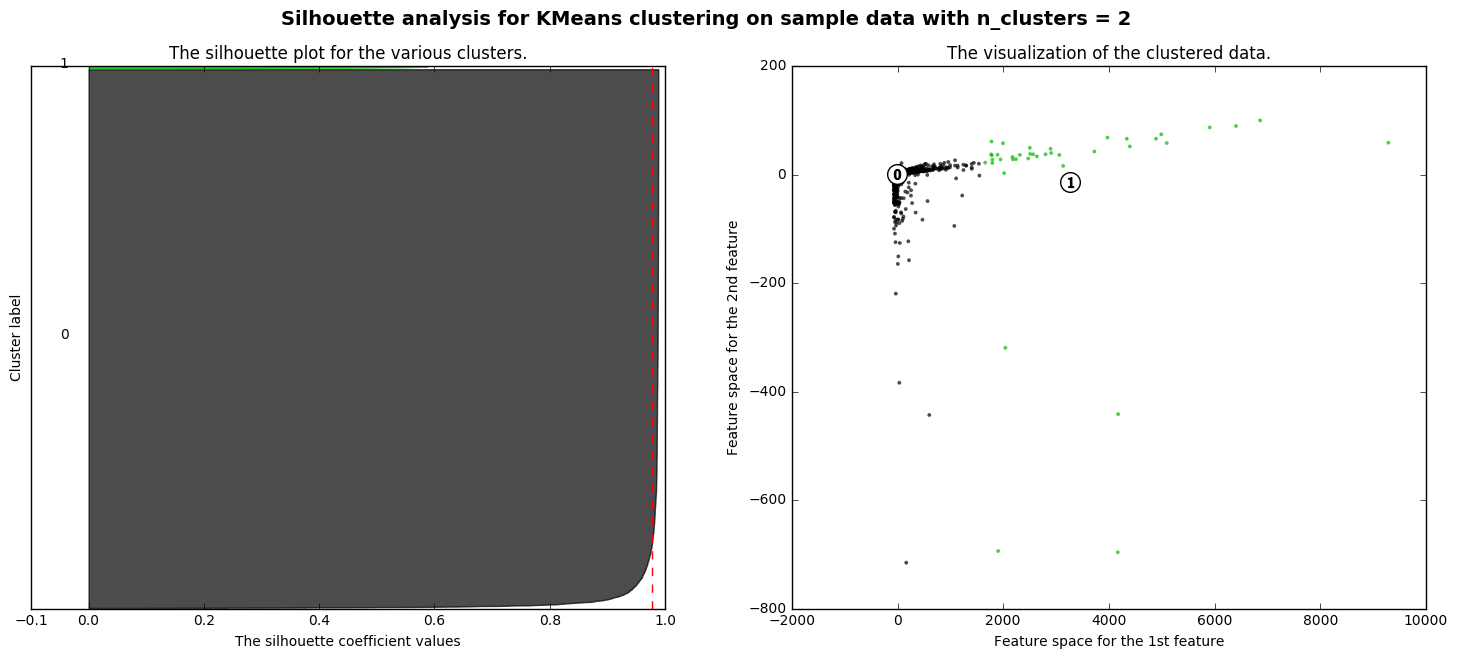

For n_clusters = 3 The average silhouette_score is : 0.958964099358


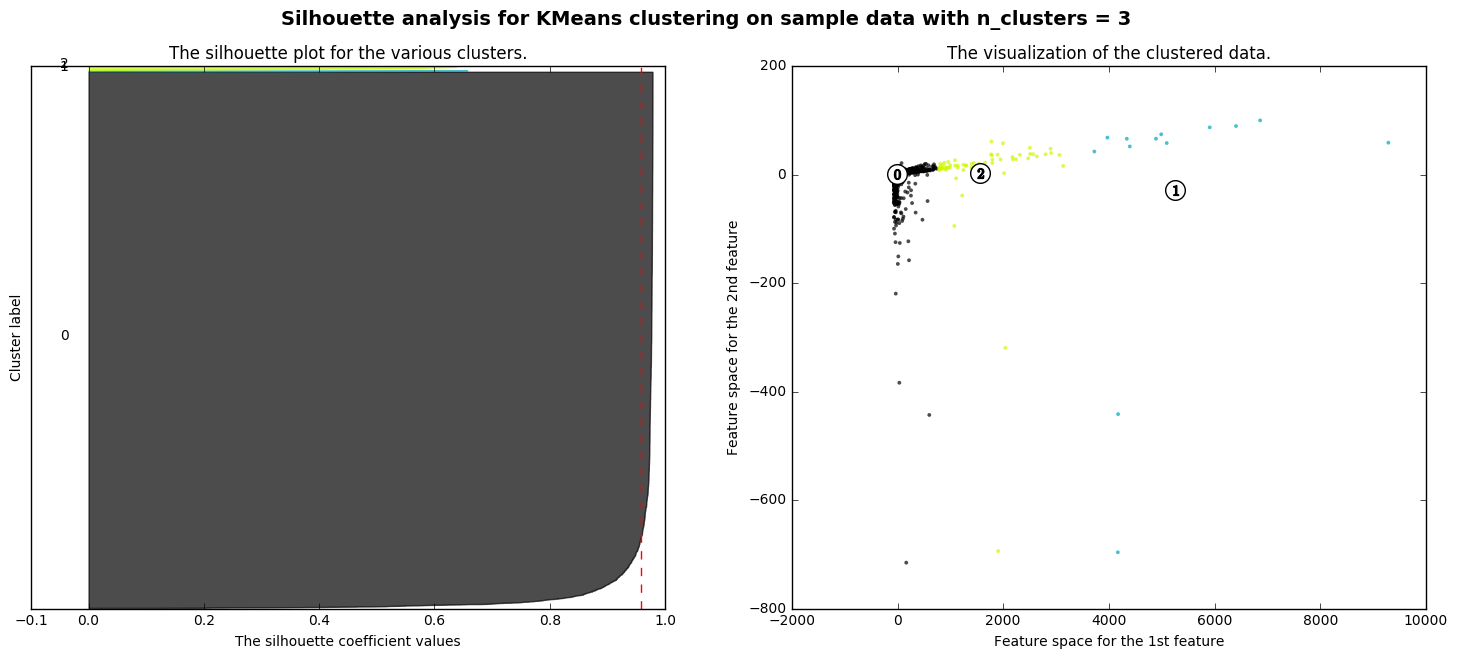

For n_clusters = 4 The average silhouette_score is : 0.880204983432


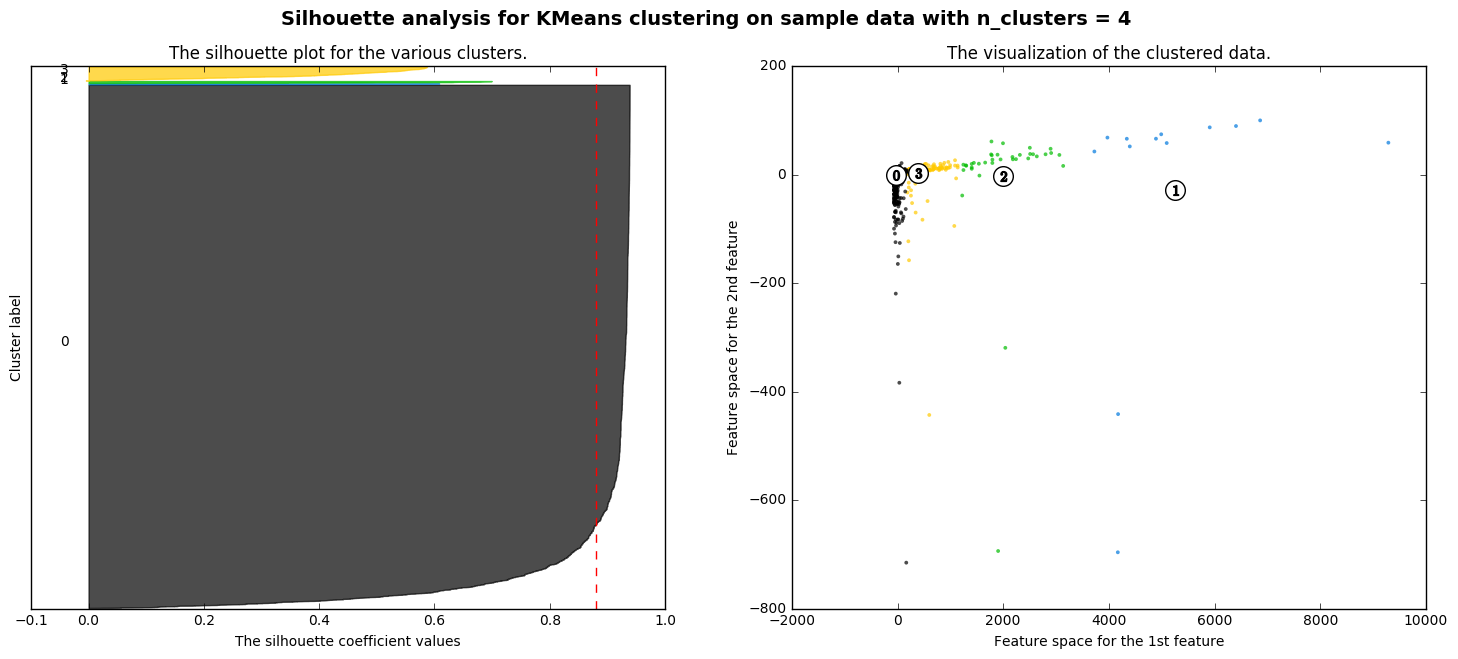

For n_clusters = 5 The average silhouette_score is : 0.88003385695


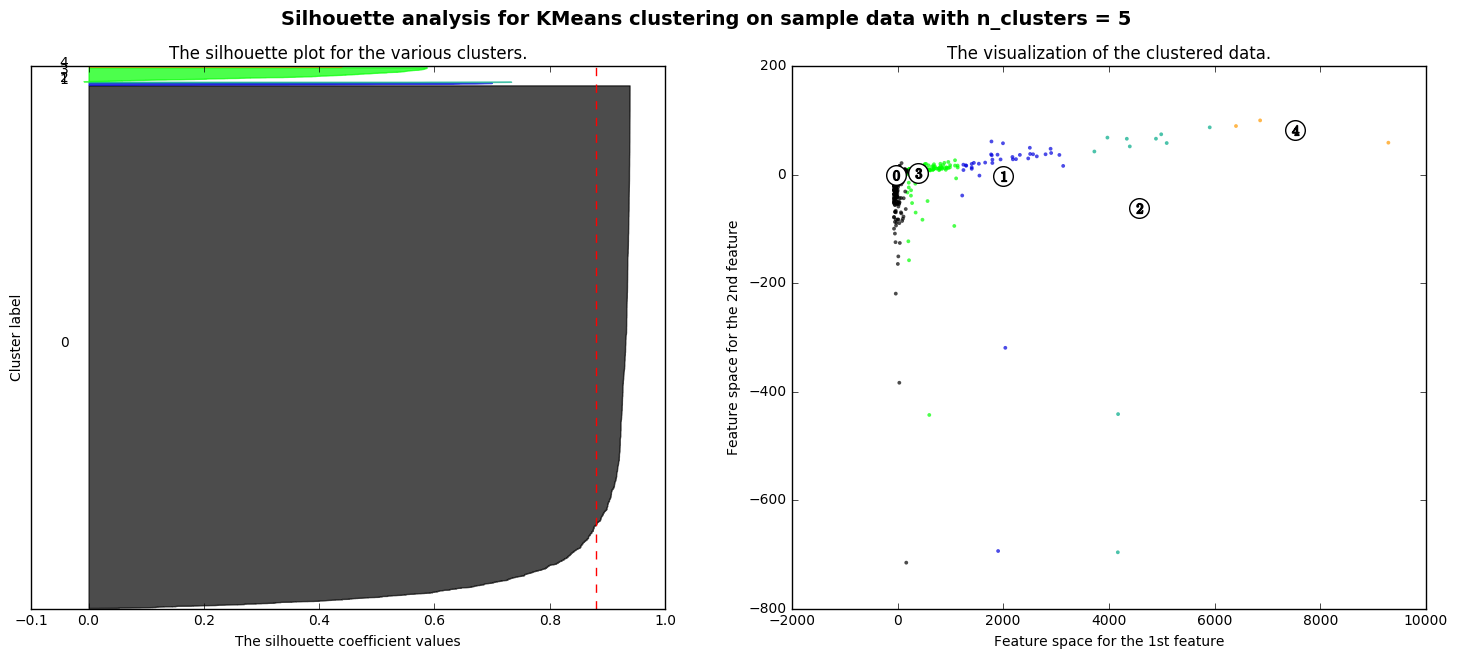

For n_clusters = 6 The average silhouette_score is : 0.792832624366


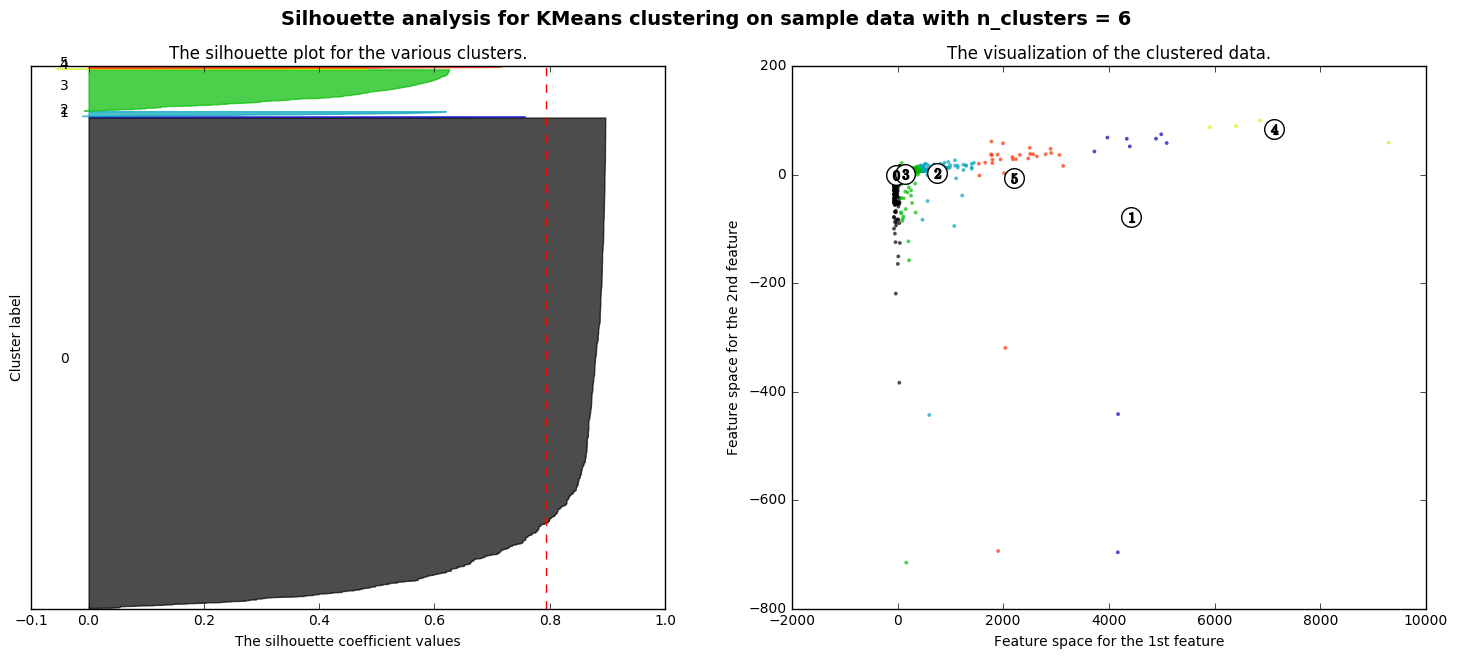

In [17]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

print(__doc__)

X = hpc

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [47]:
dataset = pd.read_csv("10000sample.csv")
categorical = ['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID']
#for it in categorical:
#    dataset[it] = [str(x) for x in dataset[it]]
#dataset.drop('Cliente_ID', axis=1, inplace=True)
dataset.head()
data = dataset.as_matrix()

In [48]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
k_means = KMeans(n_clusters = 3)
yk_pred = k_means.fit_predict(hpc)

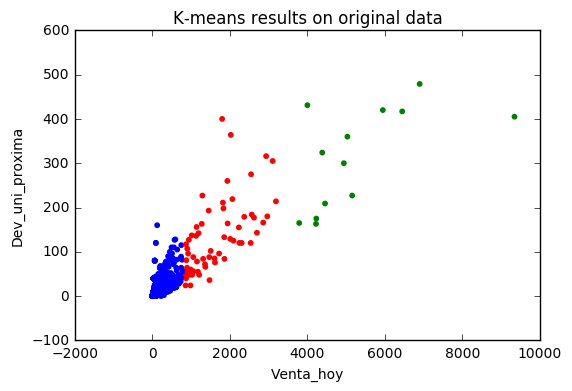

In [63]:
plt.xlabel('Venta_hoy')
plt.ylabel('Dev_uni_proxima')
plt.title('K-means results on original data')
plt.scatter(data[:, 7],data[:, 10],  color=colors[yk_pred].tolist(), s=10)
plt.show()

##### from sklearn.cluster import KMeans, SpectralClustering
k_range = range(1,9) 
k_means = [KMeans(n_clusters=k).fit(data) for k in k_range] 
SSE = [X.inertia_ for X in k_means]

fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot(k_range, SSE, 'b*-') 
ax.set_xlim((0,8))

plt.grid(True) 
plt.xlabel('n_clusters') 
plt.ylabel('Sum of squared errors') 
plt.title('Elbow graphic') 
plt.show()

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(cat_data)
#dataset.to_csv('samples_2.csv',index=False)

In [ ]:
encoded = enc.transform(cat_data).toarray()
encoded

In [12]:
hpc

array([[-51.4854165 ,   0.28297376],
       [-45.09525552,   0.57079142],
       [-37.49561393,   0.73984223],
       ..., 
       [-52.25186942,   0.27896669],
       [-46.82722211,   0.56136186],
       [-13.67128497,   1.00155789]])

In [ ]:
from kmodes.kprototypes import KPrototypes
dataset = pd.read_csv("10000sample.csv")
categorical = ['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID']
for it in categorical:
    dataset[it] = [str(x) for x in dataset[it]]
#dataset.drop('Cliente_ID', axis=1, inplace=True)
dataset.head()

In [ ]:
data = dataset.as_matrix()

In [ ]:
k_proto = KPrototypes(n_clusters=3, verbose=2).fit(data, categorical = [0,1,2,3,4,5])
yk_pred = k_proto.predict(data, categorical = [0,1,2,3,4,5])

In [ ]:
grouped.to_csv('trtest.csv')

In [ ]:
df = pd.read_csv("trtest.csv")

In [ ]:
df

In [ ]:
data

In [ ]:
hpc